In [4]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [8]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4366,ham,I like dis sweater fr mango but no more my siz...,NaN,NaN,NaN
5025,spam,Ur cash-balance is currently 500 pounds - to m...,NaN,NaN,NaN
5325,ham,Gal n boy walking in d park. gal-can i hold ur...,NaN,NaN,NaN
3400,ham,Thanks honey. Have a great day.,NaN,NaN,NaN
56,spam,Congrats! 1 year special cinema pass for 2 is ...,NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [12]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [15]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [16]:
df['target']=label.fit_transform(df['target'])

In [23]:
df.sample(5)

,target,text
5205,1,Had your mobile 11mths ? Update for FREE to Or...
1047,1,1000's flirting NOW! Txt GIRL or BLOKE & ur NA...
1390,0,"I wonder how you got online, my love ? Had you..."
93,1,Please call our customer service representativ...
3682,0,When did i use soc... I use it only at home......


In [24]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [25]:
df.duplicated().sum()

403

In [27]:
df=df.drop_duplicates(keep='first')

### EDA

In [28]:
import matplotlib.pyplot as plt


([<matplotlib.patches.Wedge at 0x28c68800e48>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

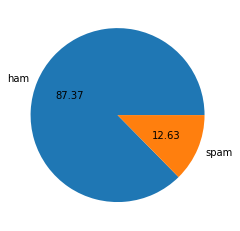

In [32]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'], autopct='%0.2f')

In [37]:
pip install nltk

  Using cached nltk-3.6.7-py3-none-any.whl (1.5 MB)
  Using cached regex-2023.8.8-cp36-cp36m-win_amd64.whl (280 kB)
  Using cached click-8.0.4-py3-none-any.whl (97 kB)
Note: you may need to restart the kernel to use updated packages.


In [38]:
import nltk

In [39]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nexgen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
df['charactors']=df['text'].apply(len)

c:\Users\Nexgen\anaconda3\envs\machineLearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
df

,target,text,charactors
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [42]:
df['words']=df['text'].apply( lambda x: len(nltk.word_tokenize(x)))

c:\Users\Nexgen\anaconda3\envs\machineLearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
df['sent']=df['text'].apply( lambda x: len(nltk.sent_tokenize(x)))

c:\Users\Nexgen\anaconda3\envs\machineLearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
df

,target,text,charactors,words,sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [46]:
df.describe()

,target,charactors,words,sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


(array([ 43.,  96., 671., 690., 543., 411., 303., 298., 228., 209., 142.,
        142., 152., 145., 168., 190., 288., 258.,  41.,  26.,  14.,  13.,
         12.,   2.,   8.,  10.,   8.,   4.,   2.,   3.,   9.,   4.,   6.,
          2.,   0.,   4.,   3.,   1.,   0.,   1.,   2.,   3.,   1.,   0.,
          1.,   1.,   0.,   1.,   1.,   1.,   2.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  2.  ,  11.08,  20.16,  29.24,  38.32,  47.4 ,  56.48,  65.56,
         74.64,  83.72,  92.8 , 101.88, 110.96, 120.04, 129.12, 138.2 ,
        147.28, 156.36, 165.44, 174.52, 183.6 , 192.68, 201.76, 210.84,
        219.92, 229.  , 238.08, 247.16, 256.24, 265.32, 274.4 , 283.48,
        292.56, 301.64, 310.72

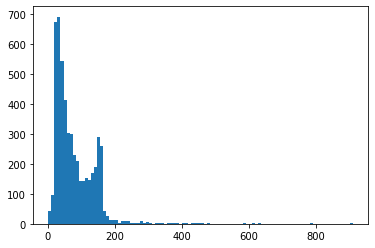

In [51]:
plt.hist(df['charactors'],bins=100)

In [53]:
df[df['target']==0][['charactors','words','sent']].describe()

,charactors,words,sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [54]:
df[df['target']==1][['charactors','words','sent']].describe()

,charactors,words,sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [55]:
import seaborn as sns

<AxesSubplot:xlabel='words', ylabel='Count'>

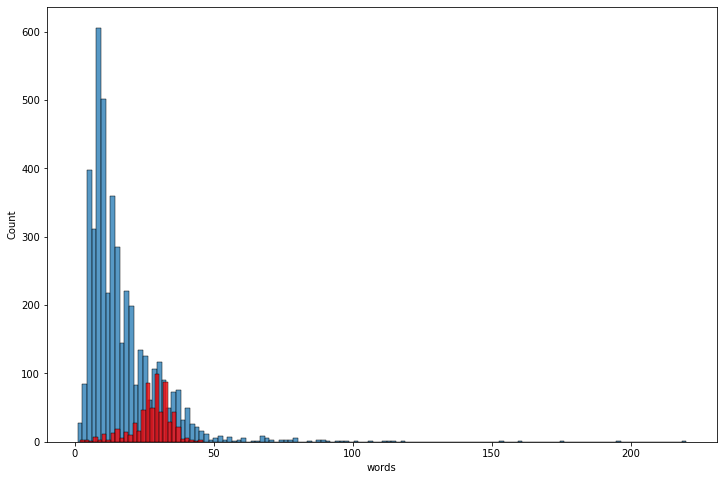

In [63]:
plt.figure(figsize=(12,8))

sns.histplot(df[df['target']==0]['words'])
sns.histplot(df[df['target']==1]['words'],color='red' )


<AxesSubplot:xlabel='charactors', ylabel='Count'>

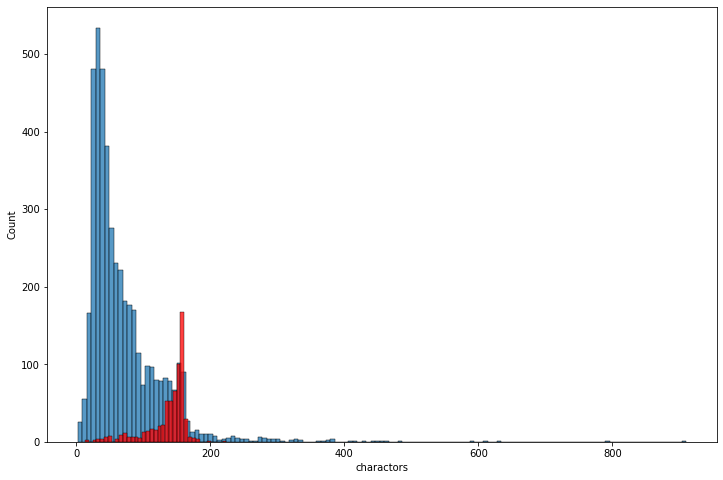

In [64]:
plt.figure(figsize=(12,8))

sns.histplot(df[df['target']==0]['charactors'])
sns.histplot(df[df['target']==1]['charactors'],color='red' )

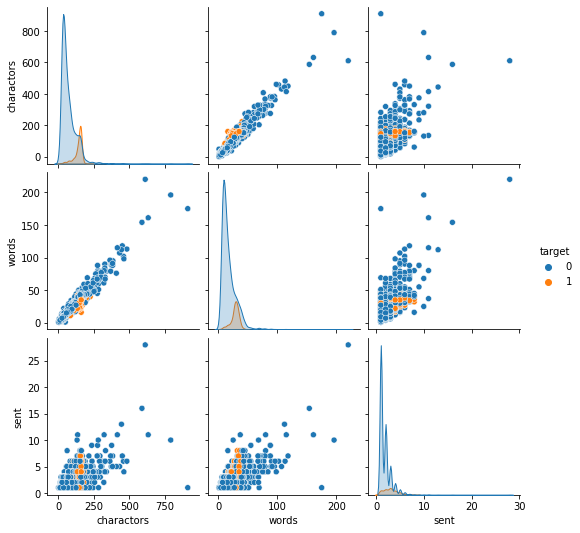

In [66]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

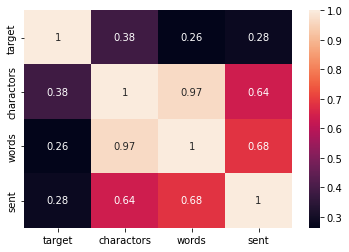

In [68]:
sns.heatmap(df.corr(),annot=True)

### Text Preprocessing

lowercase, 
Tokenize,  
remove special char, 
remove stop words and punctuation , 
stemming , 

In [109]:
def transform_text(text):
    text=text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text :
        if i.isalnum():
            y.append(i)

    x=[]


    for i in y:
        if i not in  stopwords.words('english') and i not in  string.punctuation:
            x.append(i)
    z=[]
    for i in x:
        z.append( ps.stem(i))

    

    return ' '.join(z)

In [84]:
import string

In [102]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [86]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [100]:
from nltk.corpus import stopwords


In [113]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [111]:
df['transformed_text']=df['text'].apply(transform_text)

c:\Users\Nexgen\anaconda3\envs\machineLearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [134]:
corpus=[]
for i in df[df['target']==1]['transformed_text'].tolist():
    for j in i.split():
        corpus.append(j)



In [136]:
len(corpus)

9939

In [141]:
from collections import Counter


c:\Users\Nexgen\anaconda3\envs\machineLearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

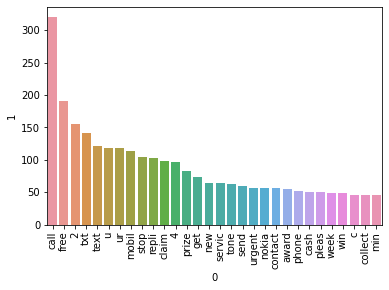

In [149]:
sns.barplot(pd.DataFrame(Counter(corpus).most_common(30))[0],pd.DataFrame(Counter(corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show

In [157]:
ham_corpus=[]
for i in df[df['target']==0]['transformed_text'].tolist():
    for j in i.split():
        ham_corpus.append(j)



c:\Users\Nexgen\anaconda3\envs\machineLearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

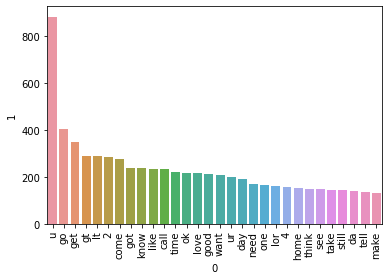

In [159]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show

### Model building
CountVectorizer

In [163]:
from sklearn.feature_extraction.text  import CountVectorizer
cv=CountVectorizer()

In [166]:
x=cv.fit_transform(df['transformed_text']).toarray()

In [167]:
y=df['target'].values

In [168]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.2)

In [173]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB 
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()



In [175]:
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(precision_score(y_test,pred))



0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [176]:
mnb.fit(x_train,y_train)
pred=mnb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(precision_score(y_test,pred))



0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [177]:
bnb.fit(x_train,y_train)
pred=bnb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(precision_score(y_test,pred))



0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


TfidfVectorizer

In [178]:
from sklearn.feature_extraction.text  import TfidfVectorizer
tf=TfidfVectorizer()

In [181]:
X=tf.fit_transform(df['transformed_text']).toarray()

In [182]:
Y=df['target'].values

In [184]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=2,test_size=0.2)

In [185]:
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(precision_score(y_test,pred))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [186]:
mnb.fit(x_train,y_train)
pred=mnb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(precision_score(y_test,pred))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [187]:
bnb.fit(x_train,y_train)
pred=bnb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(precision_score(y_test,pred))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [227]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [229]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [238]:
def train_classifier(cls,x_train,y_train,x_test,y_test):
    cls.fit(x_train,y_train)
    pred=cls.predict(x_test)
   
    accu=accuracy_score(y_test,pred)
    pres=precision_score(y_test,pred)
    return accu,pres


In [239]:
train_classifier(etc, x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9829059829059829)

In [240]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.9738878143133463
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239


In [241]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [242]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.973888,1.000000
8,ETC,0.975822,0.982906
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595
3,DT,0.935203,0.838095


### Voting Classifier

In [243]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [245]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(x_train,y_train)
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9915254237288136


### Applying stacking

In [247]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [251]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))